In [35]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [36]:
pd.set_option('display.max_columns', None)

# Before we start, I reccommend you run the above code as it ensures that all columns in the DataFrame are displayed
# which helps you better understand the structure and content of the dataset during exploration.

In [37]:
df = pd.read_csv("marketing_data.csv")
df.head()

# This code reads a CSV file named "marketing_data.csv" into a pandas DataFrame and gives a preview of the first 5 rows of the DataFrame.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## **EDA** (<i>Exploratory Data Analysis</i>)

### 1. Analysing & Performing Data Wrangling

In [38]:
df.info()

# This code provides the structure of the DataFrame, including the number of entries, column, data types etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- .info() shows that in the `Income` column there are whitespaces so there might leading and lagging whitespace in the column headers as in the records too.

In [39]:
df.columns = df.columns.str.strip()

# This code removes any leading or trailing whitespace characters from the column names of the DataFrame.

In [40]:
string_cols = df.select_dtypes(include='object').columns

for col in string_cols:
    space = (df[col] != df[col].str.strip()).sum()
    if space > 0:
        print(f"Column '{col}' has {space} values with leading/trailing whitespace.")

# This code checks each string column in the DataFrame for leading or trailing whitespace and prints the number of such values for each column.

Column 'Income' has 2240 values with leading/trailing whitespace.


In [41]:
print(df["Income"])

# Observe the "Income" Column to understand its structure and values.

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object


In [42]:
df["Income"] = df["Income"].str.replace("$", "").str.replace(",", "").str.strip().astype(float)

# This code cleans the "Income" column and then converts the values to float type.

In [43]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# This code converts the 'Dt_Customer' column to datetime format.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [45]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND


#### 2. Imputation on Null values  

In [46]:
print(df.isna().sum())

# This code checks for missing values in each column of the DataFrame.

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [47]:
str_cols = df.select_dtypes(include='object').columns

for col in str_cols:
    print(df[col].value_counts(), "\n")

# This code displaying the unique values and their frequencies for each string column in the DataFrame.

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64 

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64 



In [48]:
df['Marital_Status'] = df['Marital_Status'].replace({
                                                'Alone': 'Single',
                                                'YOLO': 'Single',
                                                'Absurd': 'Single',
                                                'Together': 'Married'})

df['Education'] = df['Education'].replace({'2n Cycle': 'Bachelor'})

# This code replaces imformal/absurd/irrlogical values with actual values in Martial_Status and Education columns.

In [49]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

# This code fills missing values in the 'Income' column by replacing them with the mean income of the corresponding 'Education' and 'Marital_Status' groups.

#### 3. Feature Engineering

In [50]:
df['Age'] = datetime.today().year - df['Year_Birth']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spend_cols].sum(axis=1)

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases']
df['Total_Purchases'] = df[purchase_cols].sum(axis=1)

# This code creates new features: 'Age', 'Total_Children', 'Total_Spend' and 'Total_Purchases' based on existing columns in the DataFrame.

In [51]:
df.drop(columns=["NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2"], inplace=True)
# This code drops some columns from the DataFrame that are not needed for analysis.

#### 4. Encoding Categorical Varaibles

In [52]:
# Ordinal encoding for Education
edu = {'Basic': 1, 'Bachelor': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education'] = df['Education'].map(edu)

# One-hot encoding for Marital_Status & Country
df = pd.get_dummies(df, columns=['Marital_Status', 'Country'], drop_first=True, dtype=int)

# This code applies ordinal encoding to the 'Education' column and one-hot encoding to the 'Marital_Status' and 'Country' columns, converting categorical variables into numerical format.

In [53]:
df.head() 

# This code displays the first few rows of the DataFrame after all transformations and feature engineering have been applied.

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,Complain,Age,Total_Children,Total_Spending,Total_Purchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,3,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,55,0,1190,15,0,0,0,0,0,0,0,0,1,0
1,1,1961,3,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,1,0,64,0,577,18,0,1,0,1,0,0,0,0,0,0
2,10476,1958,3,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,0,0,67,1,251,11,1,0,0,0,0,0,0,0,0,1
3,1386,1967,3,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,0,0,58,2,11,4,1,0,0,0,0,0,0,0,0,0
4,5371,1989,3,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,1,0,36,1,91,8,0,1,0,0,0,0,0,0,1,0


## **Graphical Analysis** (*Plotting*)

#### 5.Heat Map

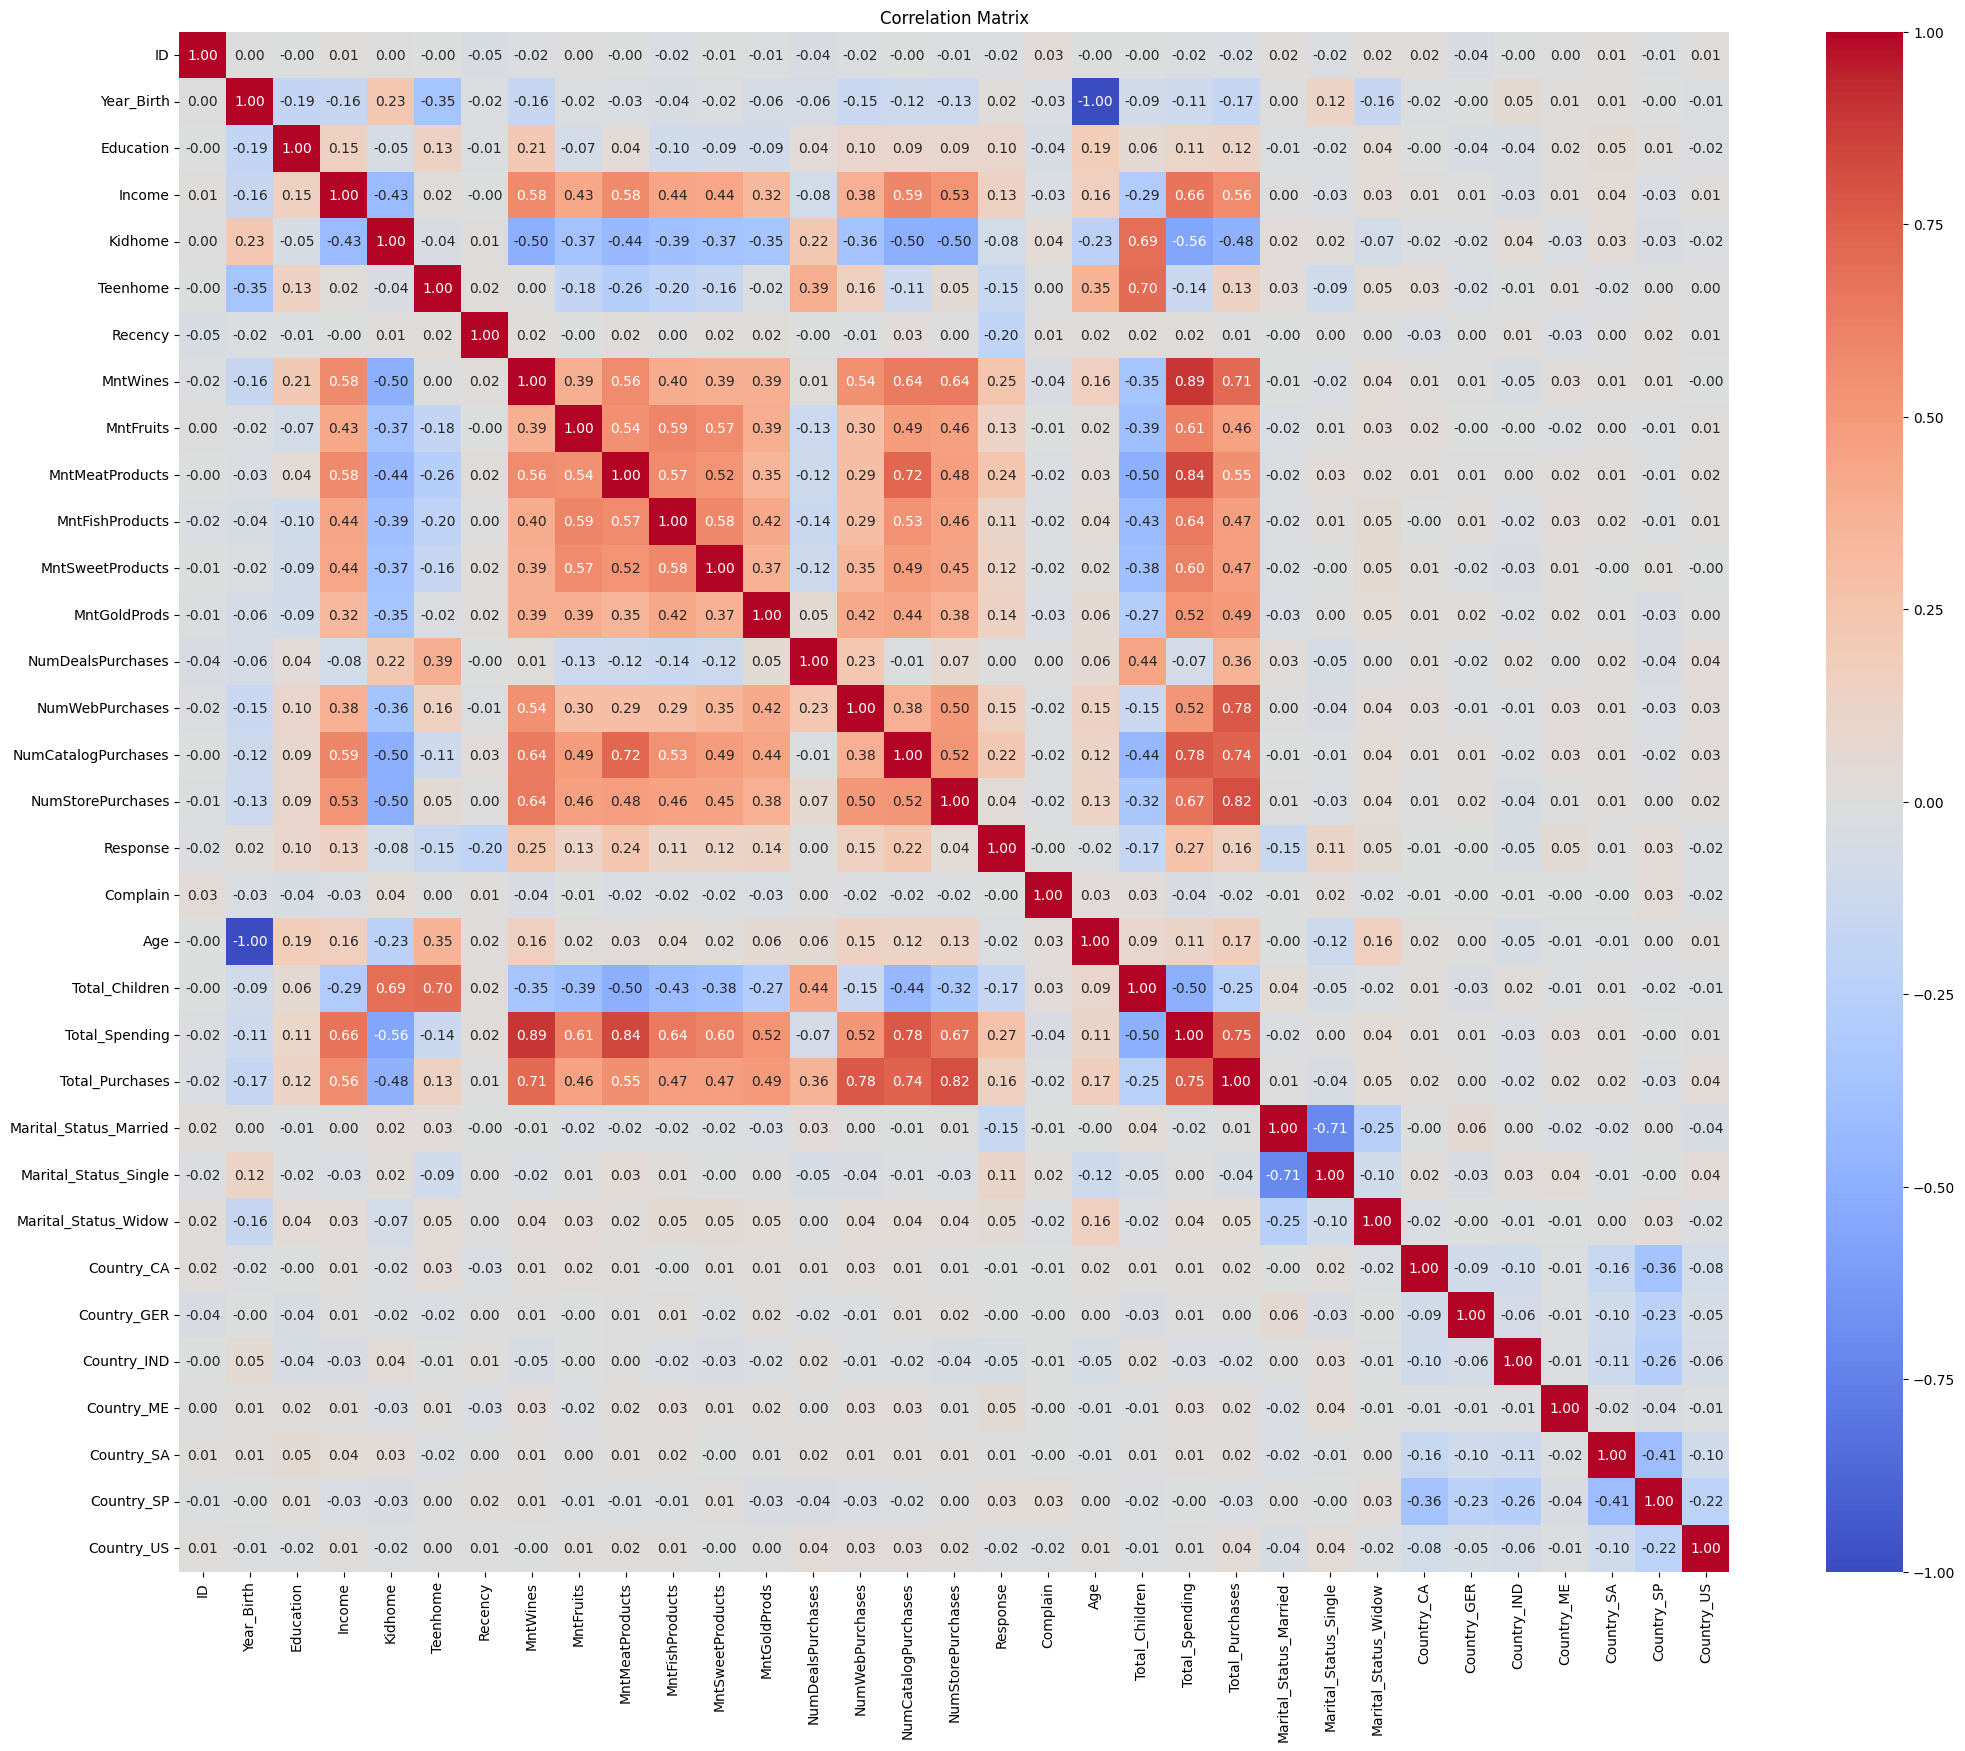

In [54]:
# Correaltion
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# This code generates a heatmap to visualize the correlation matrix of the DataFrame, showing the relationships between numerical features.

**<span style="color:Teal;">Simple_Insight:</span>** 
- Age & Year_Birth are extremely negative correlated and this is expected as $Age \propto \frac{1}{Birth\_Year}$
- If I consider `Income`,
    - with **Education** $(0.15)$, show very weak positive relationship means that income slightly impact by education background.
    - with **Kidhome** $(-0.43)$ and **Teenhome** $(-0.02)$ shows that as the number of children increases, income tends to be lower but teenagers have almost no impact on income.
    - with **spend amount on different goods** are in range of $(0.32 - 0.58)$ which is obvious that higher income people tend to spend more on various goods/articles.
    - with their **shooping behavious** where NumDealsPurchases $(-0.08)$ whereas with other modes are in range of $(0.38 - 0.59)$ which tells that high income customers spend more on shopping and don’t prefer deal-based purchases.
 

#### 6. Outlier Detection & Treatment

In [55]:
# Boxplot for Outlier Detection
cols = ['Total_Spending', 'Age', 'Income']
for col in cols:
    fig = px.box(df, y=col, title=f'Distribution of {col}',color_discrete_sequence=["#057566"])
    fig.update_layout(title_x=0.5)
    fig.show()

In [56]:
# Function to remove outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['Income'] = cap_outliers(df['Income'])
df['Total_Spending'] = cap_outliers(df['Total_Spending'])
df['Age'] = cap_outliers(df['Age'])

- The above code cells creates boxplots for *'Income', 'Total_Spend'* & *'Age'* to visualize potential outliers, and then applies the **IQR method** to cap outliers in these columns.

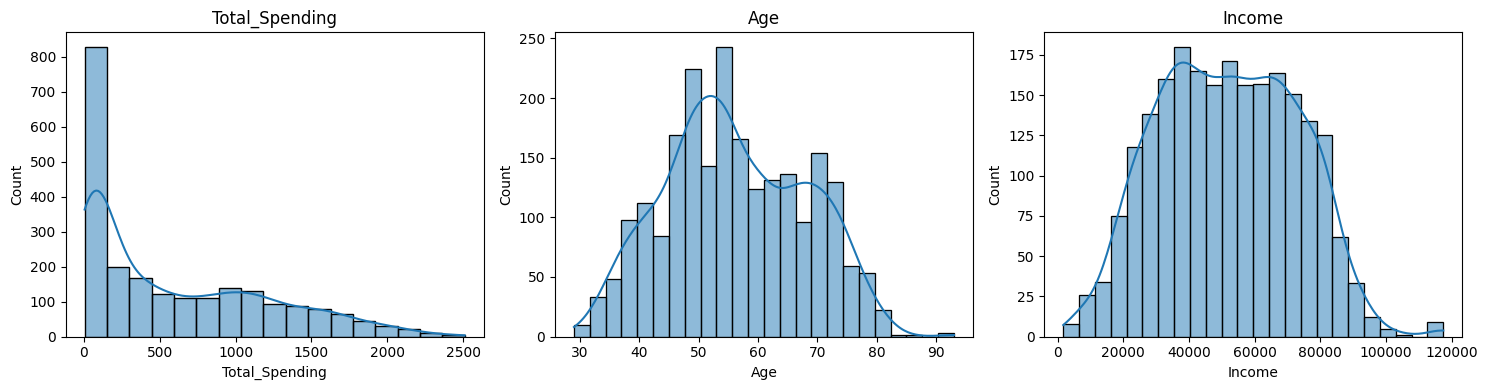

In [57]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

**<span style="color:Teal;">Insight:</span>**
1. Positively skewed; Majority population are low spenders,a few high-spending customers exist.
2. Target customer base seems to be middle-aged to older adults as the plot show majority of the population are near age group between $\sim45$ to $\sim75$ if I considered $Count>125$.
3. Majority of people $(>\sim 125)$ earn between $30,000–$70,000

#### 7. Visualization-Based Insights

In [58]:
# Top vs Bottom Products
product = [col.replace("Mnt", "").replace("Products", "").replace("Prods", "") for col in spend_cols]

product_mean = df[spend_cols].mean()
product_mean.index = product

fig = px.pie(names=product_mean.index,values=product_mean.values,title="Distribution of Average Customer Spending by Product Category",hole=0.6)

fig.update_traces(textinfo='percent+label')  
fig.update_layout(showlegend=False)
fig.update_layout(title_x=0.5)
fig.show()

**<span style="color:Teal;">Insight:</span>**
Highest selling product is *Wine* whereas *Fruits* are least demanding goods according to the dataset.

In [59]:
# Age vs Campaign Response

df['Age_Group'] = pd.cut(df['Age'], bins=[25, 35, 45, 55, 65, 75, 85, 95], 
                         labels=['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'], right=False)

age_data = pd.crosstab(df['Age_Group'], df['Response'], normalize='index')
age_data.columns = ['Rejected', 'Accepted']
age_data = age_data.reset_index()
age_counts = df['Age_Group'].value_counts().sort_index()
age_data['Data Points'] = age_counts.values

fig = px.bar(age_data, x='Age_Group', y=['Rejected', 'Accepted'],
             barmode='stack', title='Customer Campaign Response Patterns Across Age Groups',
             color_discrete_map={'Rejected': "#7436BB", 'Accepted': "#197742"},
             labels={'value': 'Proportion', 'Age_Group': 'Age Group'},
             hover_data={'Data Points': True, 'Age_Group': True})

fig.update_layout(legend_title_text='Response',title_x=0.5)
fig.show()

**<span style="color:Teal;">Insight:</span>**
According to the dataset, the top 2 age group for accepted & rejected in campaign are:
- Accepted age groups : 25-34 and 75-84
- Rejected age groups : 85-94 and 65-74

In [60]:
# Country with the Greatest Number of Customers Who Accepted the Last Campaign

country_cols = [col for col in df.columns if col.startswith("Country_")]
country_acceptance = df[df['Response'] == 1][country_cols].sum().sort_values(ascending=False)

# Convert Series to DataFrame
country_acceptance_df = country_acceptance.reset_index()
country_acceptance_df.columns = ['Country', 'Count']
country_acceptance_df['Country'] = country_acceptance_df['Country'].str.replace("Country_", "")

fig = px.bar(country_acceptance_df,x='Country', y='Count',
             color='Country', title='Customer Acceptance Volume by Country for the Last Marketing Campaign',
             labels={'Country': 'Country', 'Count': 'Customer Count'},
             color_discrete_sequence=px.colors.qualitative.Set1) 

fig.update_layout(title_x=0.5)

fig.show()

**<span style="color:Teal;">Insight:</span>** The Plot inform us that SP has greatest number of customers and ME has least number of customers who accepted last campaign.

In [ ]:
# Total Spend by customers having number of Children
spend = df.groupby('Total_Children')['Total_Spending'].sum().reset_index()

spend['Total_Children'] = spend['Total_Children'].astype(str)

fig = px.bar(spend, x='Total_Children', y='Total_Spending',
             title='Spending Patterns Based on Number of Children',
             labels={'Total_Children': 'Number of Children', 'Total_Spend': 'Total Spend'},
             color='Total_Children',
             color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title_x=0.5)
fig.show()

**<span style="color:Teal;">Insight:</span>** *The Plot states that customers with 0 children spend the most overall and as the number of children increases, total spending decreases consistently decreases.*

This indicates that,
$$
\text{Number of Children} \propto \frac{1}{\text{Total\_Spending}}
$$

In [62]:
# Comparison of Purchases Across Channels

purchase_df = df.melt(
    value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    var_name='Channel',
    value_name='Purchases')

channel_totals = purchase_df.groupby('Channel')['Purchases'].sum().reset_index()

# Plotly Pie Chart
fig = px.pie(channel_totals,names='Channel',values='Purchases',
             title='Channel-Wise Purchase Distribution',
             hole=0.5,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_traces(textinfo='value',
                  hovertemplate='%{label}<br>Purchases: %{value}<br>Percentage: %{percent}')
fig.update_layout(title_x=0.45)
fig.show()

**<span style="color:Teal;">Insight:</span>** *According to the dataset, Majority of the customers preffered offline shopping rather other shopping channels and the least popular channel between customers purchases made with discount.*

In [63]:
# Education Background of Customers Who Complained in Last 2 Years

edu_map = {1: 'Basic', 2: 'Bachelor', 3: 'Graduation', 4: 'Master', 5: 'PhD'}
complain = df[df['Complain'] == 1]['Education'].map(edu_map).value_counts().sort_index()

complain_df = complain.reset_index()
complain_df.columns = ['Education Level', 'Number of Complaints']

fig = px.pie(complain_df,
             names='Education Level',
             values='Number of Complaints',
             title='Education Background of Customers Who Complained in Last 2 Years',
             hole=0.5,color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_traces(textinfo='value',
                  hovertemplate='%{label}<br>Purchases: %{value}<br>Percentage: %{percent}')
fig.update_layout(title_x=0.48)
fig.show()

**<span style="color:Teal;">Insight:</span>** *Graduate Education background fellas has most number of Complaints whereas PhD Education background customers has least number of complaints in the last 2 years according to the dataset.*

## **Hypothesis Testing**

In [64]:
df[["Year_Birth","Age","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Total_Spending","Total_Purchases","Income"]].describe()
# This code provides a statistical summary of the DataFrame, including count, mean, standard deviation, min, max, and quartiles for each numerical column.

,Year_Birth,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Spending,Total_Purchases,Income
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,56.147768,2.325000,4.084821,2.662054,5.790179,605.779408,14.862054,51879.918487
std,11.984069,11.771725,1.932238,2.778714,2.923101,3.250958,602.189559,7.677173,20938.454543
min,1893.000000,29.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1730.000000
25%,1959.000000,48.000000,1.000000,2.000000,0.000000,3.000000,68.750000,8.000000,35538.750000
50%,1970.000000,55.000000,2.000000,4.000000,2.000000,5.000000,396.000000,15.000000,51498.500000
75%,1977.000000,66.000000,3.000000,6.000000,4.000000,8.000000,1045.500000,21.000000,68289.750000
max,1996.000000,93.000000,15.000000,27.000000,28.000000,13.000000,2510.625000,44.000000,117416.250000


> `Hypothesis 1:` Older people are not as tech-savvy and prefer shopping in-store.

-----For Age: 40 years-----
Older vs Younger Store Purchases - t-statistic: 1.283142
Older vs Younger Store Purchases - p-value: 0.200556

Result:- Fail to Reject Null Hypothesis as no significant difference in store purchases based on age.

-----For Age: 45 years-----
Older vs Younger Store Purchases - t-statistic: 3.645711
Older vs Younger Store Purchases - p-value: 0.000288

Result:- Reject Null Hypothesis as significant difference in store purchases based on age.

-----For Age: 50 years-----
Older vs Younger Store Purchases - t-statistic: 4.489470
Older vs Younger Store Purchases - p-value: 0.000008

Result:- Reject Null Hypothesis as significant difference in store purchases based on age.



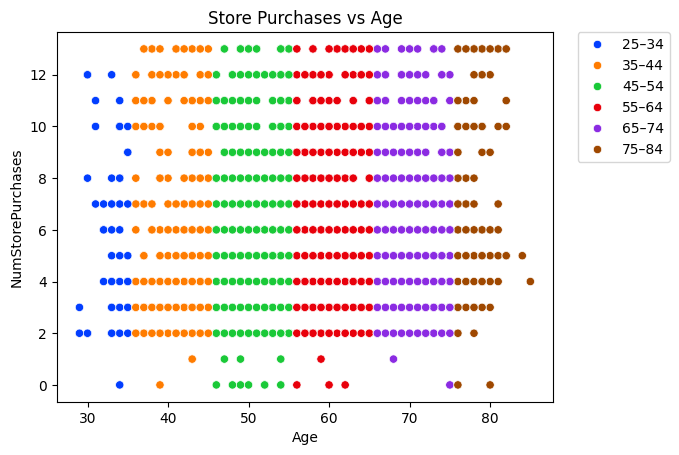

In [65]:
# t-test for Age and Store Purchases

m_age = [40,45,50] 

for i in m_age:
    print(f"-----For Age: {i} years-----")
    
    older = df[df['Age'] > i]['NumStorePurchases']
    younger = df[df['Age'] <= i]['NumStorePurchases']

    tstat, pval = stats.ttest_ind(older, younger, equal_var=False)
    print(f"Older vs Younger Store Purchases - t-statistic: {tstat:.6f}")
    print(f"Older vs Younger Store Purchases - p-value: {pval:.6f}\n")
    if pval < 0.05:
        print("Result:- Reject Null Hypothesis as significant difference in store purchases based on age.\n")
    else:
        print("Result:- Fail to Reject Null Hypothesis as no significant difference in store purchases based on age.\n")

df['Age_Group'] = pd.cut(df['Age'], bins=[25, 35, 45, 55, 65, 75, 85], labels=['25–34', '35–44', '45–54', '55–64', '65–74', '75–84'])
sns.scatterplot(x='Age', y='NumStorePurchases', hue='Age_Group', data=df, palette='bright').set(title="Store Purchases vs Age")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**<span style="color:purple;">Conclusion:</span>** *T-tests were done to check if older people prefer shopping offline. At age $40$, there was no clear difference between older and younger customers. But at ages $45$ and $50$, older people made significantly more in-store purchases. This means people aged 45 and above are more likely to shop in-store, supporting the idea that they may be less comfortable with online shopping.*

*However, even though the t-test, p-test and scatterplot supports the null hypothesis, the dataset doesn't have fixed age groups. According to df.describe(), the ages range from $29$ to $93$. So it's hard to be completely sure about specific age points like $40$, $45$, or $50$. It would be better to add more age-groups to get clearer results. But, acc. to the current dataset and if I consider $(>=50)$ as old people than the current hypothesis cannot reject null hypothesis.*


> `Hypothesis 2:` Customers with kids prefer to shop online.

Web Purchases p-value: 0.000411
Web Purchases t-statistic: -3.541894

Result:- Reject Null Hypothesis as significant difference in web purchases based on number of children.



<Axes: xlabel='Total_Children', ylabel='NumWebPurchases'>

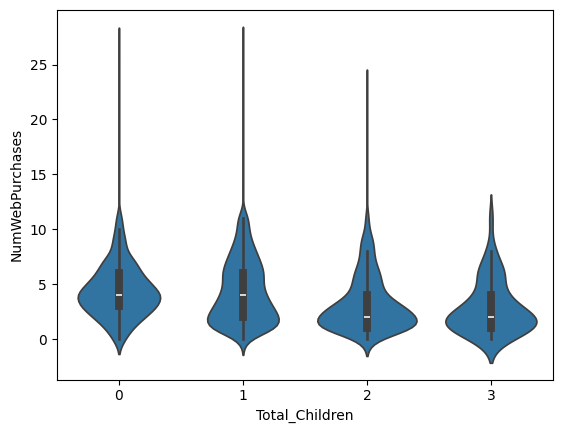

In [66]:
w_kid = df[df['Total_Children'] > 0]['NumWebPurchases']
wo_kid = df[df['Total_Children'] == 0]['NumWebPurchases']

tstat, pval = stats.ttest_ind(w_kid, wo_kid, equal_var=False)
print(f"Web Purchases p-value: {pval:.6f}")
print(f"Web Purchases t-statistic: {tstat:.6f}\n")
if pval < 0.05:
    print("Result:- Reject Null Hypothesis as significant difference in web purchases based on number of children.\n")
else:
    print("Result:- Fail to Reject Null Hypothesis as number of children doesn't affect the web.\n")

sns.violinplot(x='Total_Children', y='NumWebPurchases', data=df)

**<span style="color:purple;">Conclusion:</span>** *The p-value $(0.000411)$ and t-statistic $(-3.542)$ indicate a significant difference in web purchases based on the number of children. However, the negative t-statistic suggests that customers with kids may not prefer online shopping, and instead, they could be shopping both online and offline, or even lean more towards offline channels like in-store or catalog purchases. So, I reject this hypothesis as it is not supported by the data.*

`Hypothesis 3:` Other channels cannibalize store purchases.

Correlation between Deals & Store Purchases: 0.07
Correlation between Web & Store Purchases: 0.50
Correlation between Catalog & Store Purchases: 0.52


<Axes: >

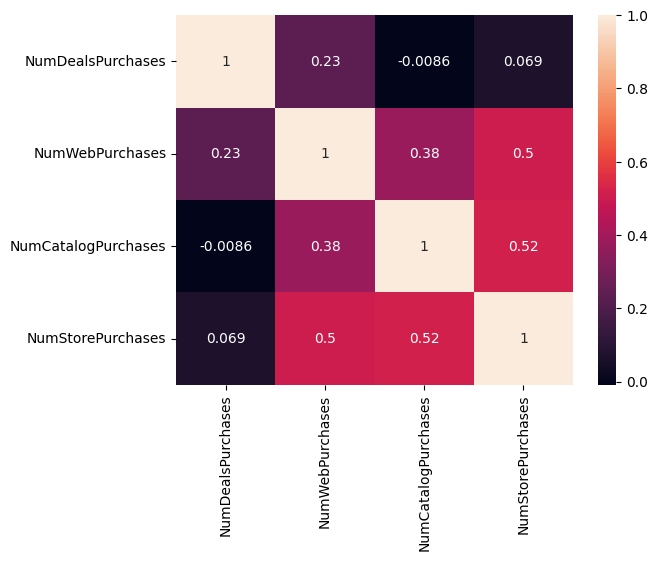

In [67]:
corr_deal_store = df['NumDealsPurchases'].corr(df['NumStorePurchases'])
corr_web_store = df['NumWebPurchases'].corr(df['NumStorePurchases'])
corr_catalog_store = df['NumCatalogPurchases'].corr(df['NumStorePurchases'])

print(f"Correlation between Deals & Store Purchases: {corr_deal_store:.2f}")
print(f"Correlation between Web & Store Purchases: {corr_web_store:.2f}")
print(f"Correlation between Catalog & Store Purchases: {corr_catalog_store:.2f}")


sns.heatmap(df[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].corr(), annot=True)

**<span style="color:purple;">Conclusion:</span>** *The correlation between web and store purchases is $0.50$, and between catalog and store purchases is $0.52$, indicating a <b>moderate positive relationship</b>. This means as web or catalog purchases increase, store purchases also tend to increase. Similarly, the correlation with deals is very weak (0.07). Hence, the data does not support the idea of cannibalization—other channels do not reduce store purchases, but may actually complement them.*

`Hypothesis 4:` US fares significantly better than the rest of the world in total purchases.

US vs Non-US Total Purchases p-value: 0.0915
US vs Non-US Total Purchases t-statestics: 1.7015

Result:- Fail to reject the Null Hypothesis as the total purchases of US and non-US customers are statistically similar.



<Axes: xlabel='Country_US', ylabel='Total_Purchases'>

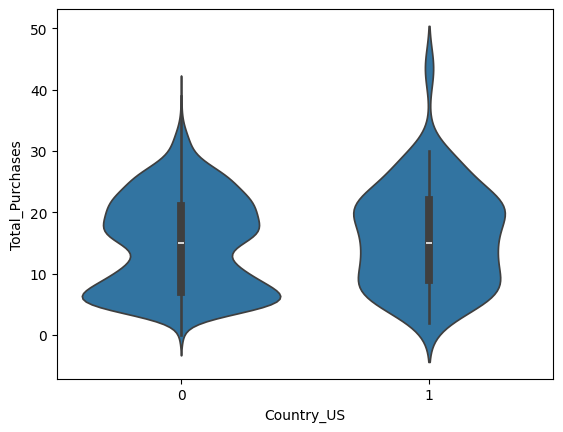

In [68]:
us = df[df['Country_US'] == 1]['Total_Purchases']
non_us = df[df['Country_US'] == 0]['Total_Purchases']

tstat, pval = stats.ttest_ind(us, non_us, equal_var=False)
print(f"US vs Non-US Total Purchases p-value: {pval:.4f}")
print(f"US vs Non-US Total Purchases t-statestics: {tstat:.4f}\n")

if pval < 0.05:
    print("Result:- Reject Null Hypothesis as significant difference in total purchases based on US country.\n")
else:
    print("Result:- Fail to reject the Null Hypothesis as the total purchases of US and non-US customers are statistically similar.\n")

sns.violinplot(x='Country_US', y='Total_Purchases', data=df)

**<span style="color:purple;">Conclusion:</span>** *The p-value is $0.0915$, which is higher than the $0.05$. This means the difference in total purchases between US and non-US customers is not statistically significant. So, we fail to reject the null hypothesis. In other words, based on this data, there's no strong evidence that people in the US shop more than those in other countries.*